<a href="https://colab.research.google.com/github/au6usto/catdog_convolutional_network/blob/master/catdog_cn_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar modelo y capas a usar

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


# Definir el modelo

In [ ]:
classifier = Sequential()

In [ ]:
# Agregar capas

classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Definir optimizador, funcion de perdida y metrica

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Conexión con el Dataset en GDrive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!mkdir ~/data
!p7zip -d '/content/drive/My Drive/dc.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/My Drive/                                  1 file, 671386308 bytes (641 MiB)

Extracting archive: /content/drive/My Drive/dc.7z
--
Path = /content/drive/My Drive/dc.7z
Type = 7z
Physical Size = 671386308
Headers Size = 206282
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 7        0% 217 - dogs-vs-cats (1)/test1/cat/1345.jpg                                                1% 308 - dogs-vs-cats (1)/test1/cat/1494.jpg                                              

In [ ]:
####
#!unzip '/content/dogs-vs-cats/train.zip'
#!unzip '/content/dogs-vs-cats/test1.zip'

# Carga de imagenes

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

# dentro de train y test se debe tener una carpeta dog y una carpeta cat con
# las imagenes correspondiente

pathTrainGoogleDrive = "/content/dogs-vs-cats (1)/train" #Modificamos para que tome
# las imagenes de los archivos desde content y no desde drive
pathTestGoogleDrive = "/content/dogs-vs-cats (1)/test1" #

train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

categories = {1: "Perro", 2: "Gato"}

training_set = train_datagen.flow_from_directory(
  pathTrainGoogleDrive,
  target_size = (128, 128),
  batch_size = 32,
  class_mode = 'binary'
)

test_set = test_datagen.flow_from_directory(
  pathTestGoogleDrive,
  target_size = (128, 128),
  batch_size = 32,
  class_mode = 'binary'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 25000 images belonging to 2 classes.
Found 5164 images belonging to 2 classes.


# Entrenamiento

In [ ]:
history = classifier.fit_generator(training_set,
 steps_per_epoch = 250,
 epochs = 90,
 validation_data = test_set,
 validation_steps = 62,
 workers=12,
 max_q_size=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=250, epochs=90, validation_data=<keras.pre..., validation_steps=62, workers=12, max_queue_size=100)`
  import sys


Epoch 1/90
250/250 [==============================] - 55s 219ms/step - loss: 0.6729 - accuracy: 0.5792 - val_loss: 0.6083 - val_accuracy: 0.6205
Epoch 2/90
250/250 [==============================] - 48s 190ms/step - loss: 0.6222 - accuracy: 0.6597 - val_loss: 0.5243 - val_accuracy: 0.6956
Epoch 3/90
250/250 [==============================] - 48s 190ms/step - loss: 0.5810 - accuracy: 0.6924 - val_loss: 0.4590 - val_accuracy: 0.7408
Epoch 4/90
250/250 [==============================] - 49s 195ms/step - loss: 0.5447 - accuracy: 0.7329 - val_loss: 0.5023 - val_accuracy: 0.7354
Epoch 5/90
250/250 [==============================] - 44s 175ms/step - loss: 0.5324 - accuracy: 0.7366 - val_loss: 0.4699 - val_accuracy: 0.7611
Epoch 6/90
250/250 [==============================] - 49s 195ms/step - loss: 0.5090 - accuracy: 0.7548 - val_loss: 0.4162 - val_accuracy: 0.7454
Epoch 7/90
250/250 [==============================] - 45s 178ms/step - loss: 0.4778 - accuracy: 0.7742 - val_loss: 0.5190 - val_ac

# Gráficas para ver desempeño de la CNN

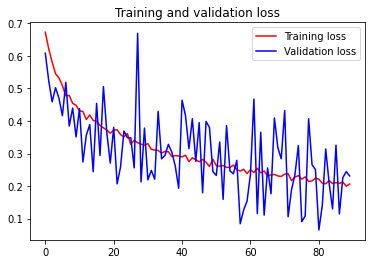

In [ ]:
# Grafica de errores de entramiento y validacion con respecto a iteraciones

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

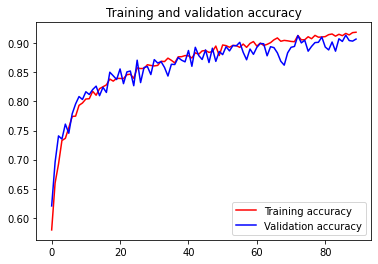

In [ ]:
# Grafica de aciertos de entramiento y validacion con respecto a iteraciones

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(accuracy))

plt.figure()

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()